In [24]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

import scipy
import numpy as np
from scipy import interpolate
from io import StringIO

# Reading data for 3 resolutions

Muninn format

In [62]:
datatime=[]
datagrid=[]
dataderuxchi=[]
dataderxchi=[]
dataxchi=[]
vars=["deruxchi", "derxchi", "xchi"]
res=[1,2,3]
for resolution in res:


    time=[]
    grid=[]
    deruxchi=[]
    derxchi=[]
    xchi=[]
    k=1

    for var in vars:
        dir = "/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res{}/{}.txt".format(resolution,var)
        
        print(dir)

        with open(dir) as f:
            for line in f:

                index = line.find("Time")
                if index==1:
                    if k==1:
                        time.append(float(line[index+7:len(line)-1]))
                    auxgrid=[]
                    auxdata=[]
                

                else:
                    a=line.split()
                    if a!=[]:
                        if k==1:
                            auxgrid.append(float(a[0]))
                        auxdata.append(float(a[1]))
                    elif a==[]:
                        grid.append(auxgrid)
                        if k==1:
                            deruxchi.append(auxdata)
                        elif k==2:
                            derxchi.append(auxdata)
                        elif k==3:
                            xchi.append(auxdata)
                    
        k=k+1


    datatime.append(time)
    datagrid.append(grid)
    dataderuxchi.append(deruxchi)
    dataderxchi.append(derxchi)
    dataxchi.append(xchi)
#count=len(datatime[2])+1
#count

/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res1/deruxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res1/derxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res1/xchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res2/deruxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res2/derxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res2/xchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res3/deruxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res3/derxchi.txt
/home/rita13santos/Desktop/MSc Thesis/Git/TMYangMills/DATA/SavedDATA/TM1/res3/xchi.txt


In [63]:
datatime[0][10]

0.1

In [64]:
len(datagrid[0][0])

207

In [65]:
print(len(dataxchi[0]))
print(len(dataderuxchi[0]))
print(len(dataderxchi[0]))

301
301
301


####

In [66]:
print(dataxchi[0][0][1]) # datam indexes give res, time then gridpoint

0.0


In [67]:
L=len(dataxchi[0][0])-6 # grid length without the ghostpoints
dx=datagrid[0][0][1]-datagrid[0][0][0]

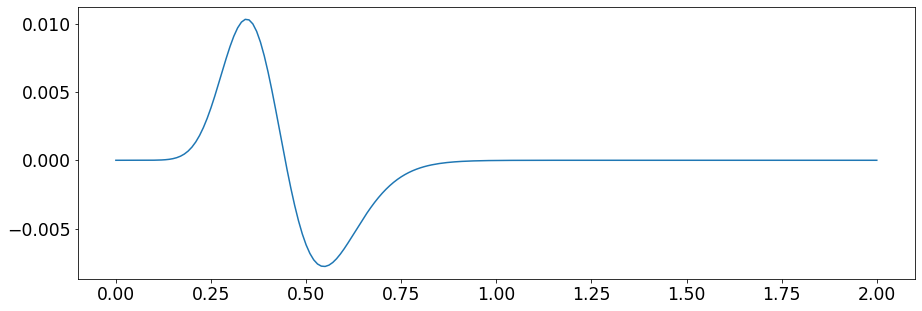

In [68]:
#plt_x1 = np.linspace(0, 1, L)
#plt_x2 = np.linspace(0, 1, 2*L-1)
#plt_x3 = np.linspace(0, 1, 4*L-3)
t=0
plt_x1 = datagrid[0][t][3:len(datagrid[0][0])-3]
plt_x2 = datagrid[1][t*2][3:len(datagrid[1][0])-3]
plt_x3 = datagrid[2][t*3][3:len(datagrid[2][0])-3]

plt.plot(plt_x1,dataderuxchi[0][0][3:len(dataderuxchi[0][0])-3])
#plt.plot(plt_x2,datam[1][0][3:len(datam[1][0])-3])
#plt.plot(plt_x3,datam[2][0][3:len(datam[2][0])-3])

# Styling plots

In [69]:
plt.rcParams.update({
    'font.size': 12,
    'legend.fontsize':12,
    'xtick.labelsize': 'large',
    'xtick.color': 'black',
    'ytick.labelsize': 'large',
    'ytick.color': 'black'})

# Plotting data with resolutions 1 and 2 and differences 

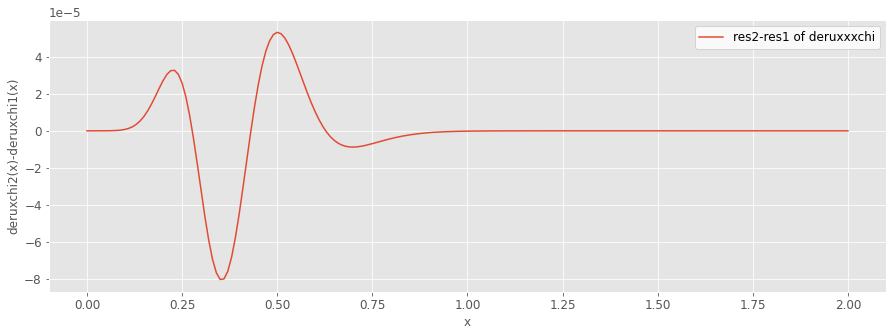

In [70]:
# for given t
t1=0 #last timestep
t2=2*t1
t3=4*t1
auxderuxchi = []
auxderxchi = []
auxxchi = []
auxgrid = []

for i in range(len(dataderuxchi[1][t2])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(dataderuxchi[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
        auxderuxchi.append(dataderuxchi[1][t2][i])
        auxderxchi.append(dataderxchi[1][t2][i])
        auxxchi.append(dataxchi[1][t2][i])
        auxgrid.append(datagrid[1][t2][i])
        #print(datam[1][0][i])

        
# array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
diffs_2_1 = []

#subtracting f in both resolutions & ignoring ghost points
diffs_2_1.append(np.subtract(dataderuxchi[0][t1][3:len(dataderuxchi[0][t1])-3],auxderuxchi))
diffs_2_1.append(np.subtract(dataderxchi[0][t1][3:len(dataderxchi[0][t1])-3],auxderxchi))
diffs_2_1.append(np.subtract(dataxchi[0][t1][3:len(dataxchi[0][t1])-3],auxxchi))

with plt.style.context('ggplot'):
    plt.plot(plt_x1, diffs_2_1[0], label = 'res2-res1 of deruxxxchi')

plt.legend()
plt.xlabel('x')
plt.ylabel('deruxchi2(x)-deruxchi1(x)')
plt.show()


In [71]:

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)



# Pointwise convergence tests: plots for thesis project report 

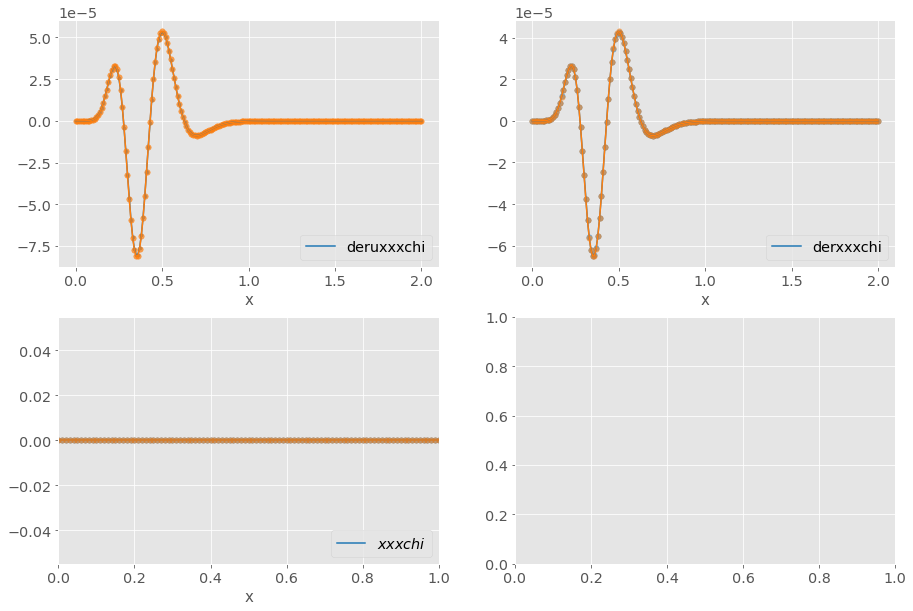

In [72]:
# for given t

aux2deruxchi = []
aux2derxchi = []
aux2xchi = []

for i in range(len(dataderuxchi[2][t3])):#iterate on the grid with higher resolution
    if ((i>2) and (i < (len(dataderuxchi[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
        aux2deruxchi.append(dataderuxchi[2][t3][i])
        aux2derxchi.append(dataderxchi[2][t3][i])
        aux2xchi.append(dataxchi[2][t3][i])

        


#subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
diffs_4_2 =[]
diffs_4_2.append(np.subtract(auxderuxchi,aux2deruxchi))
diffs_4_2.append(np.subtract(auxderxchi,aux2derxchi))
diffs_4_2.append(np.subtract(auxxchi,aux2xchi))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(2, 2,figsize=(15, 10))
   
    
    ax[0][0].plot(plt_x1, (diffs_2_1[0]), label='deruxxxchi',color='#1f77b4')
    ax[0][0].plot(plt_x1, (diffs_4_2[0])*4, color='#ff7f0e')
    ax[0][0].scatter(plt_x1, (diffs_2_1[0]),alpha=0.7,s=10,color='#1f77b4')
    ax[0][0].scatter(plt_x1, (diffs_4_2[0])*4,alpha=0.7,s=30,color='#ff7f0e')
    ax[0][0].set_xlabel('x',fontsize=15)
    #ax[0][0].set_xlim([0,0.1])
    ax[0][0].legend(loc='lower right')
    
    ax[0][1].plot(plt_x1, (diffs_2_1[1]), label='derxxxchi',color='#1f77b4')
    ax[0][1].plot(plt_x1, (diffs_4_2[1])*4, color='#ff7f0e')
    ax[0][1].scatter(plt_x1, (diffs_2_1[1]),alpha=0.5,s=30,color='#1f77b4')
    ax[0][1].scatter(plt_x1, (diffs_4_2[1])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[0][1].set_xlabel('x',fontsize=15)
    #ax[0][1].set_xlim([0, 0.05])
    #ax[0][1].set_ylim([0, 1*10**(-11)])
    ax[0][1].legend(loc='lower right')
    
    ax[1][0].plot(plt_x1, (diffs_2_1[2]), label='$xxxchi$',color='#1f77b4')
    ax[1][0].plot(plt_x1, (diffs_4_2[2])*4, color='#ff7f0e')
    ax[1][0].set_xlabel('x',fontsize=15)
    ax[1][0].scatter(plt_x1, (diffs_2_1[2]),alpha=0.5,s=30,color='#1f77b4')
    ax[1][0].scatter(plt_x1, (diffs_4_2[2])*4,alpha=0.5,s=30,color='#ff7f0e')
    ax[1][0].set_xlim([0, 1])
    ax[1][0].legend(loc='lower right')
    



plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")

plt.show()



# L2 norm convergence tests

In [73]:
#for the first time step

norm_low_med = []
norm_med_high = []

for j in range(3):
    a = 0
    b = 0
    for i in diffs_2_1[j]:
        a += i**2
    for i in diffs_4_2[j]:
        b += i**2
    norm_low_med.append(np.sqrt(a))
    norm_med_high.append(np.sqrt(b))

print("deruxxxchi convergence factor:")
print(math.log2(norm_low_med[0]/norm_med_high[0]))
print("")

print("derxxxchi convergence factor:")
print(math.log2(norm_low_med[1]/norm_med_high[1]))
print("")

print("xxxchi convergence factor:")
print(math.log2(norm_low_med[2]/norm_med_high[2]))
print("")

deruxxxchi convergence factor:
1.9908302853027033

derxxxchi convergence factor:
1.997296642259724

xxxchi convergence factor:
nan



/tmp/ipykernel_15088/2231725298.py:25: RuntimeWarning: invalid value encountered in scalar divide
  print(math.log2(norm_low_med[2]/norm_med_high[2]))


# Q(t)

In [74]:
final_t=len(datatime[2])
final_t

1201

In [79]:
rsquarednorm=False

using evol variables deruxchi xchi

/tmp/ipykernel_15088/689766965.py:72: RuntimeWarning: invalid value encountered in scalar divide
  Q_xchi.append(math.log2(norm_low_med[1]/norm_med_high[1]))


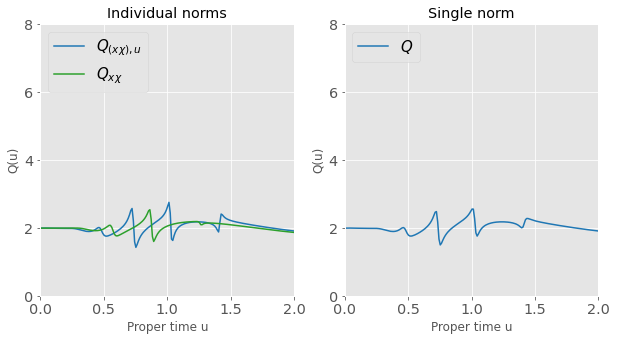

In [80]:
"""from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))"""

Q_deruxchi = []
Q_xchi = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxderuxchi = []
    auxxchi = []

    for i in range(len(dataderuxchi[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxderuxchi.append(dataderuxchi[1][t2][i])
            auxxchi.append(dataxchi[1][t2][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(dataderuxchi[0][t1][3:len(dataderuxchi[0][t1])-3],auxderuxchi))
    diffs_2_1.append(np.subtract(dataxchi[0][t1][3:len(dataxchi[0][t1])-3],auxxchi))

    # for given t

    aux2deruxchi = []
    aux2xchi = []
    for i in range(len(dataderuxchi[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2deruxchi.append(dataderuxchi[2][t3][i])
            aux2xchi.append(dataxchi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxderuxchi,aux2deruxchi))
    diffs_4_2.append(np.subtract(auxxchi,aux2xchi))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(2):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_deruxchi.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_xchi.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 3, len(Q_deruxchi))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_deruxchi, label = '$Q_{(x\chi){,u}}$',color='#1f77b4')
    ax[0].plot(plt_x, Q_xchi, label = '$Q_{x\chi}$',color='#2ca02c')
    
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,2])
    ax[0].legend(loc ="upper left",fontsize=15)
    ax[0].set_xlabel('Proper time u')
    ax[0].set_ylabel('Q(u)')
    ax[0].set_title('Individual norms')
    
    
    ax[1].plot(plt_x, Q, label = '$Q$',color='#1f77b4')
    #ax[1].plot(x100, Q100, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,2])
    ax[1].legend(loc ="upper left",fontsize=15)
    ax[1].set_title('Single norm')
    #plt.xticks(rotation=45)
    ax[1].set_xlabel('Proper time u')
    ax[1].set_ylabel('Q(u)')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


/tmp/ipykernel_15088/2475737060.py:80: RuntimeWarning: invalid value encountered in scalar divide
  Q_xchi.append(math.log2(norm_low_med[2]/norm_med_high[2]))


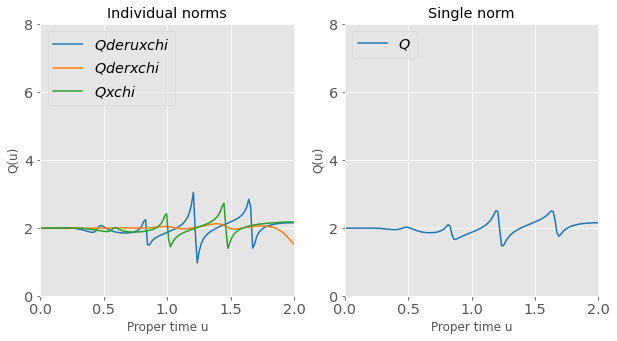

In [58]:
"""from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y'])))"""

Q_deruxchi = []
Q_derxchi = []
Q_xchi = []
Q= []


for t in range(0,int(final_t/4)):
    # for given t
    t1=t #last timestep
    t2=2*t1
    t3=4*t1
    auxderuxchi = []
    auxderxchi = []
    auxxchi = []

    for i in range(len(dataderuxchi[1][t2])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[1][t2])-3)) and ((i%2)!=0)): #ignoring ghost points
            auxderuxchi.append(dataderuxchi[1][t2][i])
            auxderxchi.append(dataderxchi[1][t2][i])
            auxxchi.append(dataxchi[1][t2][i])


    # array for all diff_m_2_1 diff_beta_2_1 diff_psi_2_1 diff_derpsi_2_1
    diffs_2_1 = []

    #subtracting f in both resolutions & ignoring ghost points
    diffs_2_1.append(np.subtract(dataderuxchi[0][t1][3:len(dataderuxchi[0][t1])-3],auxderuxchi))
    diffs_2_1.append(np.subtract(dataderxchi[0][t1][3:len(dataderxchi[0][t1])-3],auxderxchi))
    diffs_2_1.append(np.subtract(dataxchi[0][t1][3:len(dataxchi[0][t1])-3],auxxchi))

    # for given t

    aux2deruxchi = []
    aux2derxchi = []
    aux2xchi = []
    for i in range(len(dataderuxchi[2][t3])):#iterate on the grid with higher resolution
        if ((i>2) and (i < (len(dataderuxchi[2][t3])-3)) and (((i+1)%4)==0)): #ignoring ghost points
            aux2deruxchi.append(dataderuxchi[2][t3][i])
            aux2derxchi.append(dataderxchi[2][t3][i])
            aux2xchi.append(dataxchi[2][t3][i])



    #subtracting m beta psi and derpsi in both resolutions & ignoring ghost points
    diffs_4_2 =[]
    diffs_4_2.append(np.subtract(auxderuxchi,aux2deruxchi))
    diffs_4_2.append(np.subtract(auxderxchi,aux2derxchi))
    diffs_4_2.append(np.subtract(auxxchi,aux2xchi))


    ####

    norm_low_med = []
    norm_med_high = []
    single_norm_low_med = []
    single_norm_med_high = []
    s_a=0
    s_b=0

    for j in range(3):
        a = 0
        b = 0
        for i in diffs_2_1[j]:
            a += i**2
            s_a += i**2
        for i in diffs_4_2[j]:
            b += i**2
            s_b += i**2
        norm_low_med.append(np.sqrt(a))
        norm_med_high.append(np.sqrt(b))

    single_norm_low_med=np.sqrt(s_a)
    single_norm_med_high=np.sqrt(s_b)
    
    Q_deruxchi.append(math.log2(norm_low_med[0]/norm_med_high[0]))
    Q_derxchi.append(math.log2(norm_low_med[1]/norm_med_high[1]))
    Q_xchi.append(math.log2(norm_low_med[2]/norm_med_high[2]))
    Q.append(math.log2(single_norm_low_med/single_norm_med_high))
    ####
    
plt_x = np.linspace(0, 3.0, len(Q_deruxchi))
#plt_x = np.linspace(0, int(final_t/4)*dx*step, int(final_t/4))
with plt.style.context('ggplot'):
    
    fig, ax = plt.subplots(1, 2,figsize=(10, 5))
    
    ax[0].plot(plt_x, Q_deruxchi, label = '$Q deruxchi$',color='#1f77b4')
    ax[0].plot(plt_x, Q_derxchi, label = '$Q derxchi$',color='#ff7f0e')
    ax[0].plot(plt_x, Q_xchi, label = '$Q xchi$',color='#2ca02c')
    
    ax[0].set_ylim([0,8])
    ax[0].set_xlim([0,2])
    ax[0].legend(loc ="upper left")
    ax[0].set_xlabel('Proper time u')
    ax[0].set_ylabel('Q(u)')
    ax[0].set_title('Individual norms')
    
    
    ax[1].plot(plt_x, Q, label = '$Q$',color='#1f77b4')
    #ax[1].plot(x100, Q100, linestyle='dotted',alpha=0.7,color='#1f77b4')
    ax[1].set_ylim([0,8])
    ax[1].set_xlim([0,2])
    ax[1].legend(loc ="upper left")
    ax[1].set_title('Single norm')
    #plt.xticks(rotation=45)
    ax[1].set_xlabel('Proper time u')
    ax[1].set_ylabel('Q(u)')

plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")
plt.show()


In [59]:
Q_xxxchi

NameError: name 'Q_xxxchi' is not defined